# Importing Packages,Reading and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the  dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\DataTrained\medical_cost_insurance.csv",encoding = "ISO-8859-1")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df_male = df[df["sex"] == "male"]

In [8]:
df_female = df[df["sex"] == "female"]


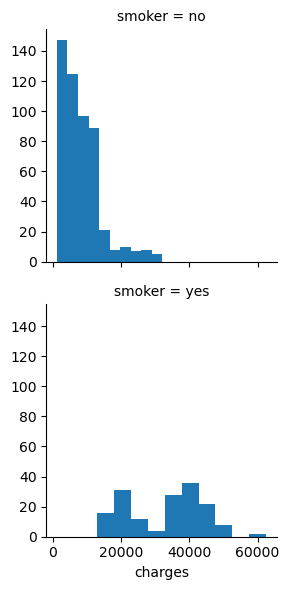

In [9]:
#Male who are smoking with their Insurance Charge
g = sns.FacetGrid(df_male,  row="smoker")
g = g.map(plt.hist, "charges")

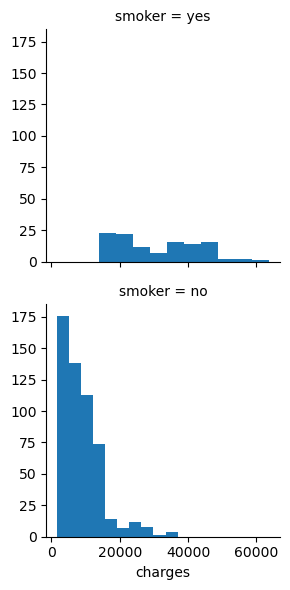

In [10]:
#Female who are smoking with their Insurance Charge
g = sns.FacetGrid(df_female,  row="smoker")
g = g.map(plt.hist, "charges")

<AxesSubplot:xlabel='age', ylabel='sex'>

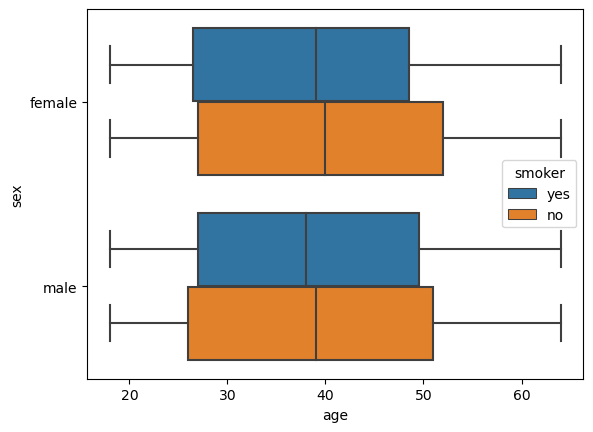

In [11]:
#Checking Male and Female Smaoking at what age
sns.boxplot(x='age',y='sex',hue='smoker',data=df)

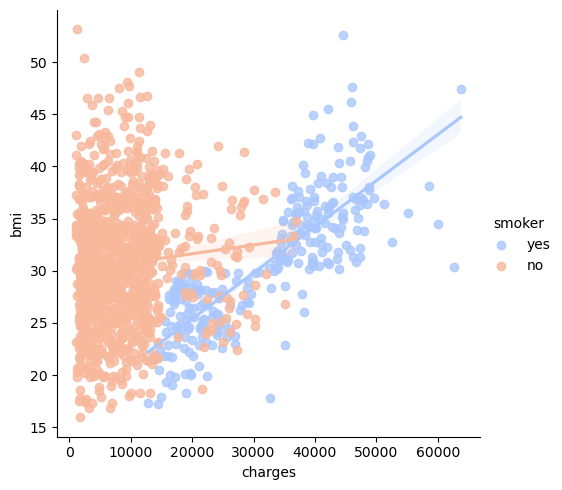

In [12]:
#Checking bmi with charges(smoker with bmi between 30 to 50 have high charges)
sns.lmplot(x='charges', y='bmi',hue='smoker',data=df,palette='coolwarm')

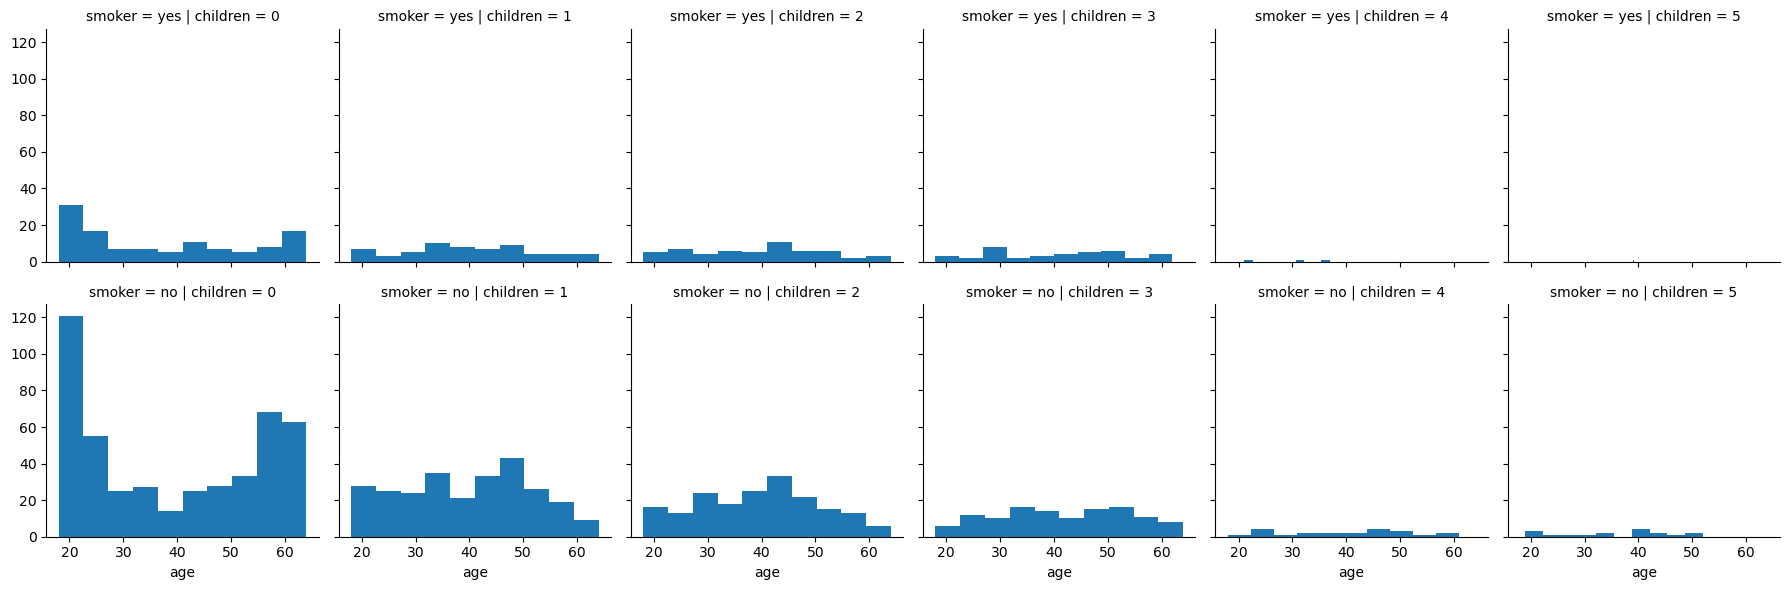

In [13]:
#Smoker and NO Smoker with childrens
g = sns.FacetGrid(df, col="children",  row="smoker")
g = g.map(plt.hist, "age")

In [14]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

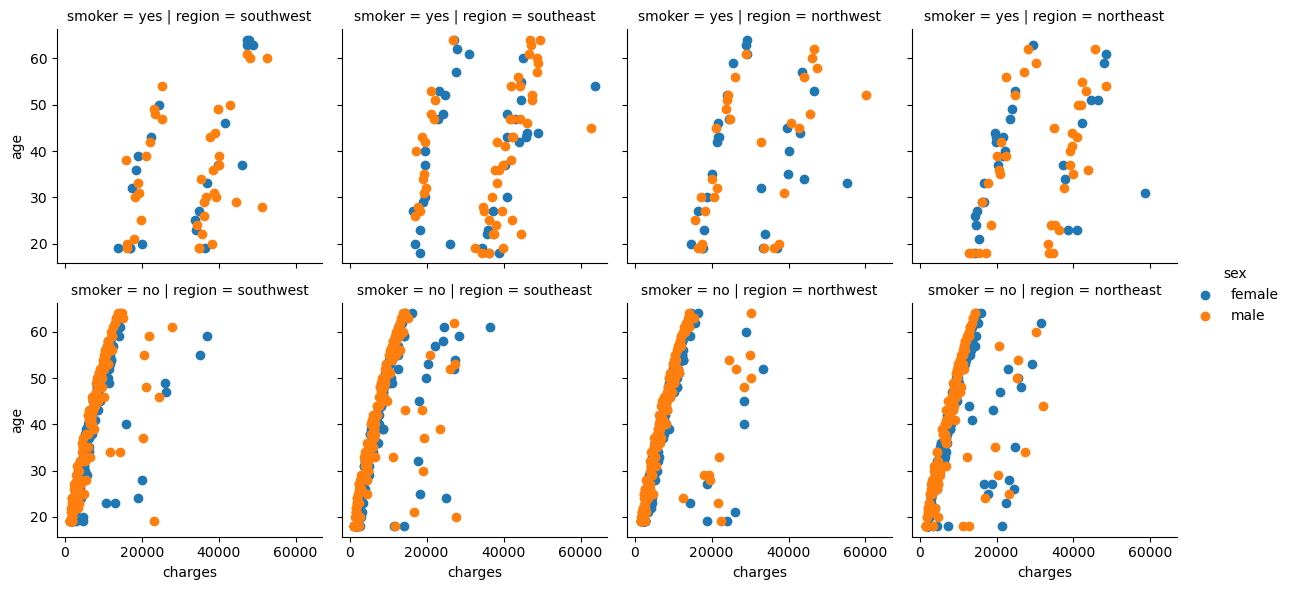

In [15]:
#Region + Age wise people getting insurance
g = sns.FacetGrid(df, col="region",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "charges","age").add_legend()

In [16]:
#As Region doesn't play role in Insurances redemtion so we will drop it.
df = df.drop(labels=['region'],axis=1)

In [17]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [18]:
#Using Label Encoder on labels=sex,smoker,children
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['children'] = label_encoder.fit_transform(df['children'])

In [19]:
X = df[['age','sex','bmi','children','smoker']]
y = df['charges']

In [20]:
#Train Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [22]:
#Creating training Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
#Predictions
predictions = lm.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


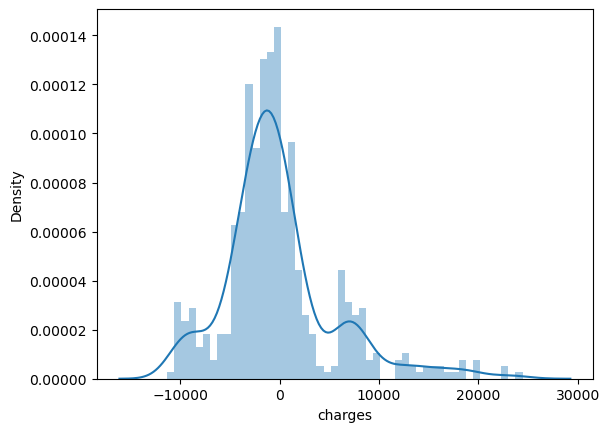

In [24]:
sns.distplot((y_test-predictions),bins=50);

In [25]:
#calculating r squared
SS_Residual = sum((y_test-predictions)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
print('R Squared:', r_squared)

R Squared: 0.7661770377474628


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


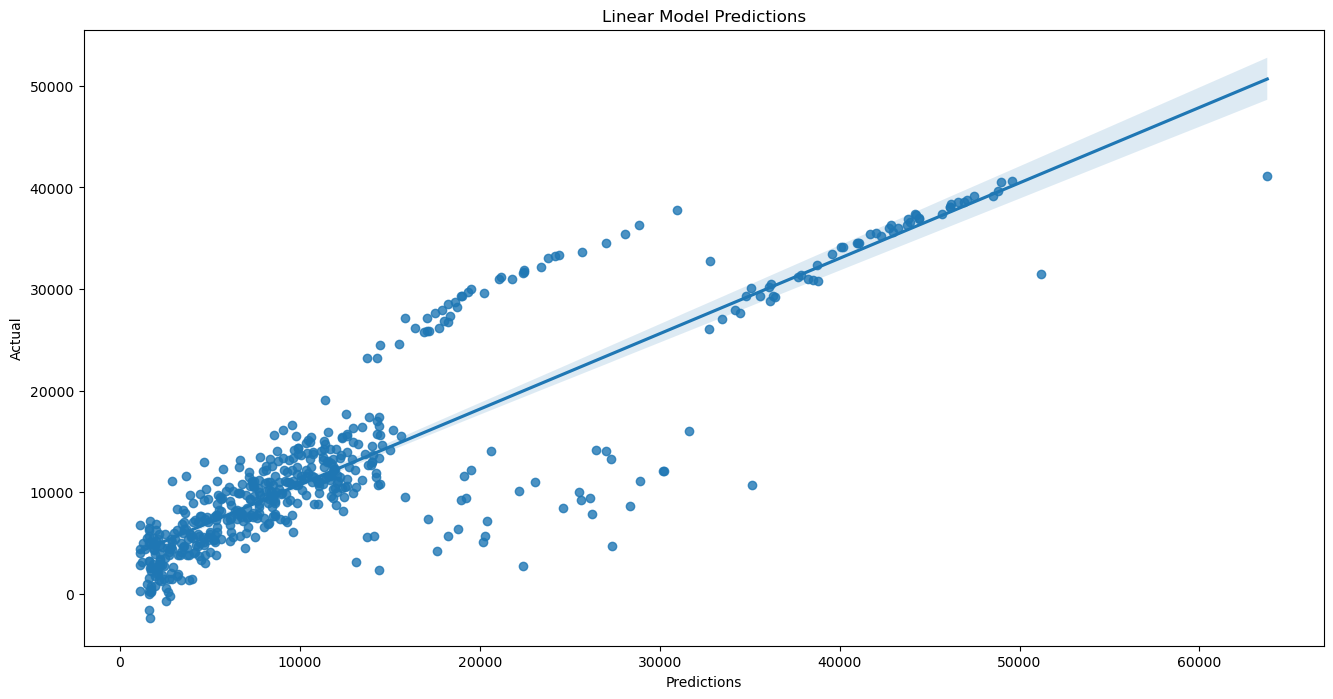

In [26]:
#regression plot of the real test values versus the predicted values

plt.figure(figsize=(16,8))
sns.regplot(y_test,predictions)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()